# GDAS-SWD - first-look data analysis for continuous recordings

This notebook contains basic data visualization and analysis of the data collected with Stryde nodes at KAUST as part of the GDAS project during the period of February 27 to April 1.

More specifically we focus here on the passive day recorded between 5AM and 3PM KSA time (2AM - 12PM UTC time).

The dataset is acquired as follows:

- <font color='blue'>Receivers</font>

    1 line of 89 buried receivers, equally spaced by 2m for a total lenght of 178m.

    1 receiver placed near the rig


In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import numpy as np
import pylops
import matplotlib.pyplot as plt
import logging

from pystryde.reader import *
from pystryde.preproc import *
from pystryde.cmap import cmaps
from pystryde.stats import *
from pystryde.visual import *

logging.getLogger().setLevel(logging.ERROR)

## Single-receiver Continous record

Start: 2024-03-12 02:00:00 End: 2024-03-12 12:59:00


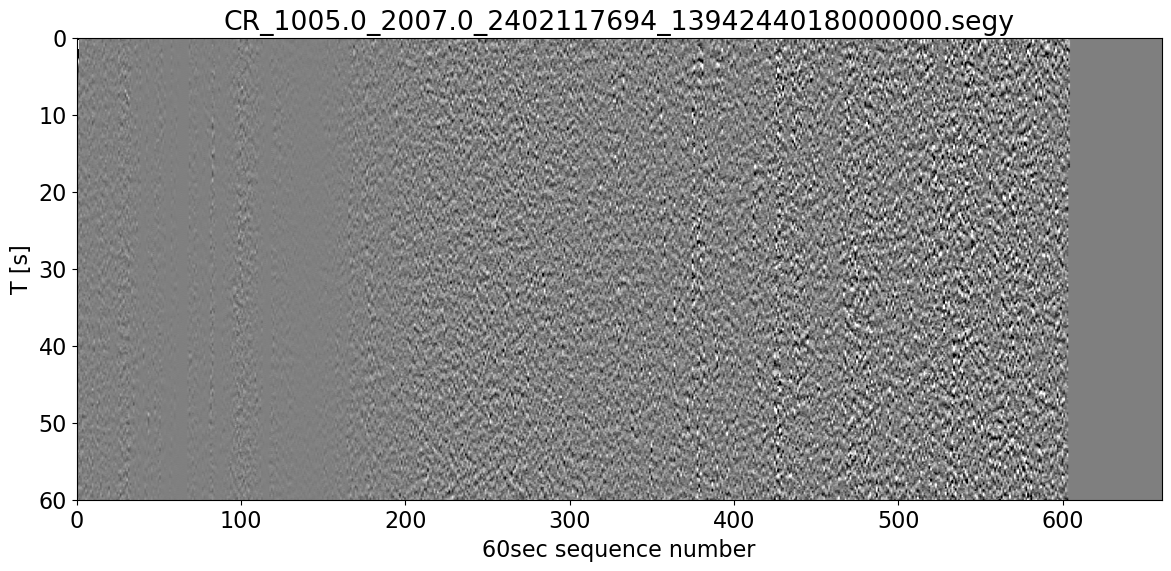

In [2]:
# Early deployment
f = strydecont('/mnt/datawaha_dig/Data/STRYDE/GDASSWD_27_02_to_01_04_2024/ContinuousRecords/12_03/CR_1005.0_2007.0_2402117694_1394244018000000.segy')
f.interpret()
f.getrecord()
print(f'Start: {f.utctime[0]} End: {f.utctime[-1]}')
f.plotrecord(figsize=(14, 6), title='CR_1005.0_2007.0_2402117694_1394244018000000.segy', clip=5e-4);

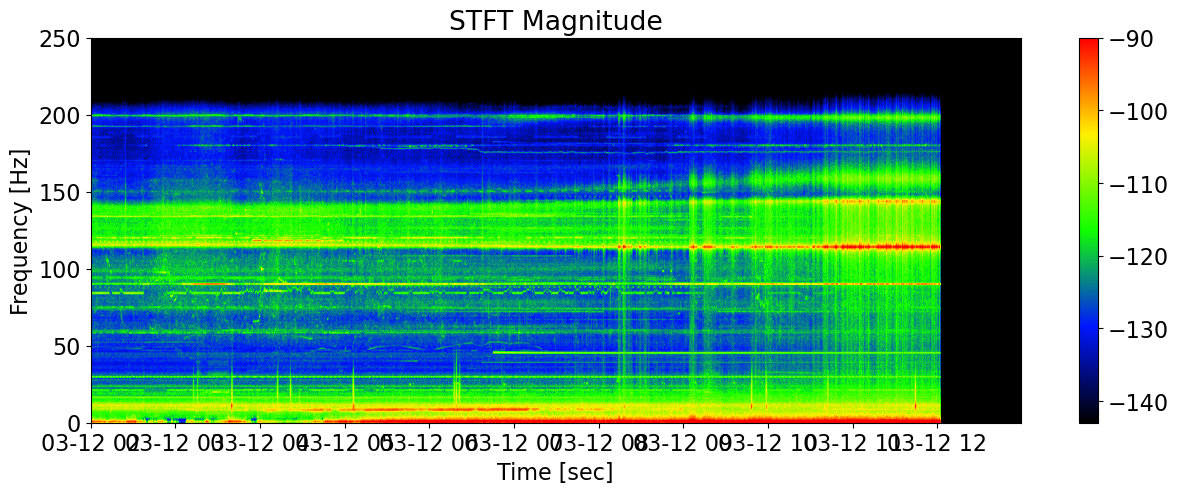

In [3]:
fig, ax = plt.subplots(1, 1, figsize=(15, 5))

spectrogram(ax, f.data.ravel(), f.dt, 2., overlap=0.25, db=True, 
            clim=(-130, -90), cmap=cmaps['spectrum_r'], tlims=(f.utctime[0], f.utctime[-1]));

## Entire data Continous record

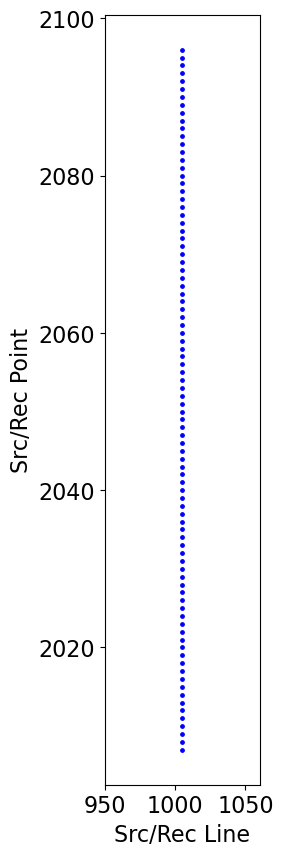

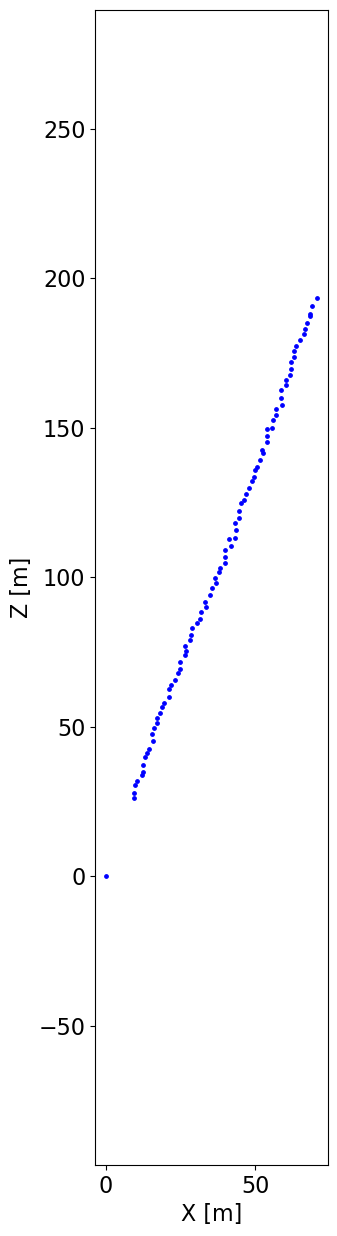

In [4]:
f = strydeconts('/mnt/datawaha_dig/Data/STRYDE/GDASSWD_27_02_to_01_04_2024/ContinuousRecords/12_03/')
f.interpret()
f.plotgeom(coords=False, figsize=(2, 10))
fig, ax = f.plotgeom(local=True, figsize=(3, 15))
ax.axis('equal')

# extract records in a choosen time window
f.getrecords(utctime_start=datetime.datetime(2024, 3, 12, 3, 0), 
             utctime_end=datetime.datetime(2024, 3, 12, 9, 59))

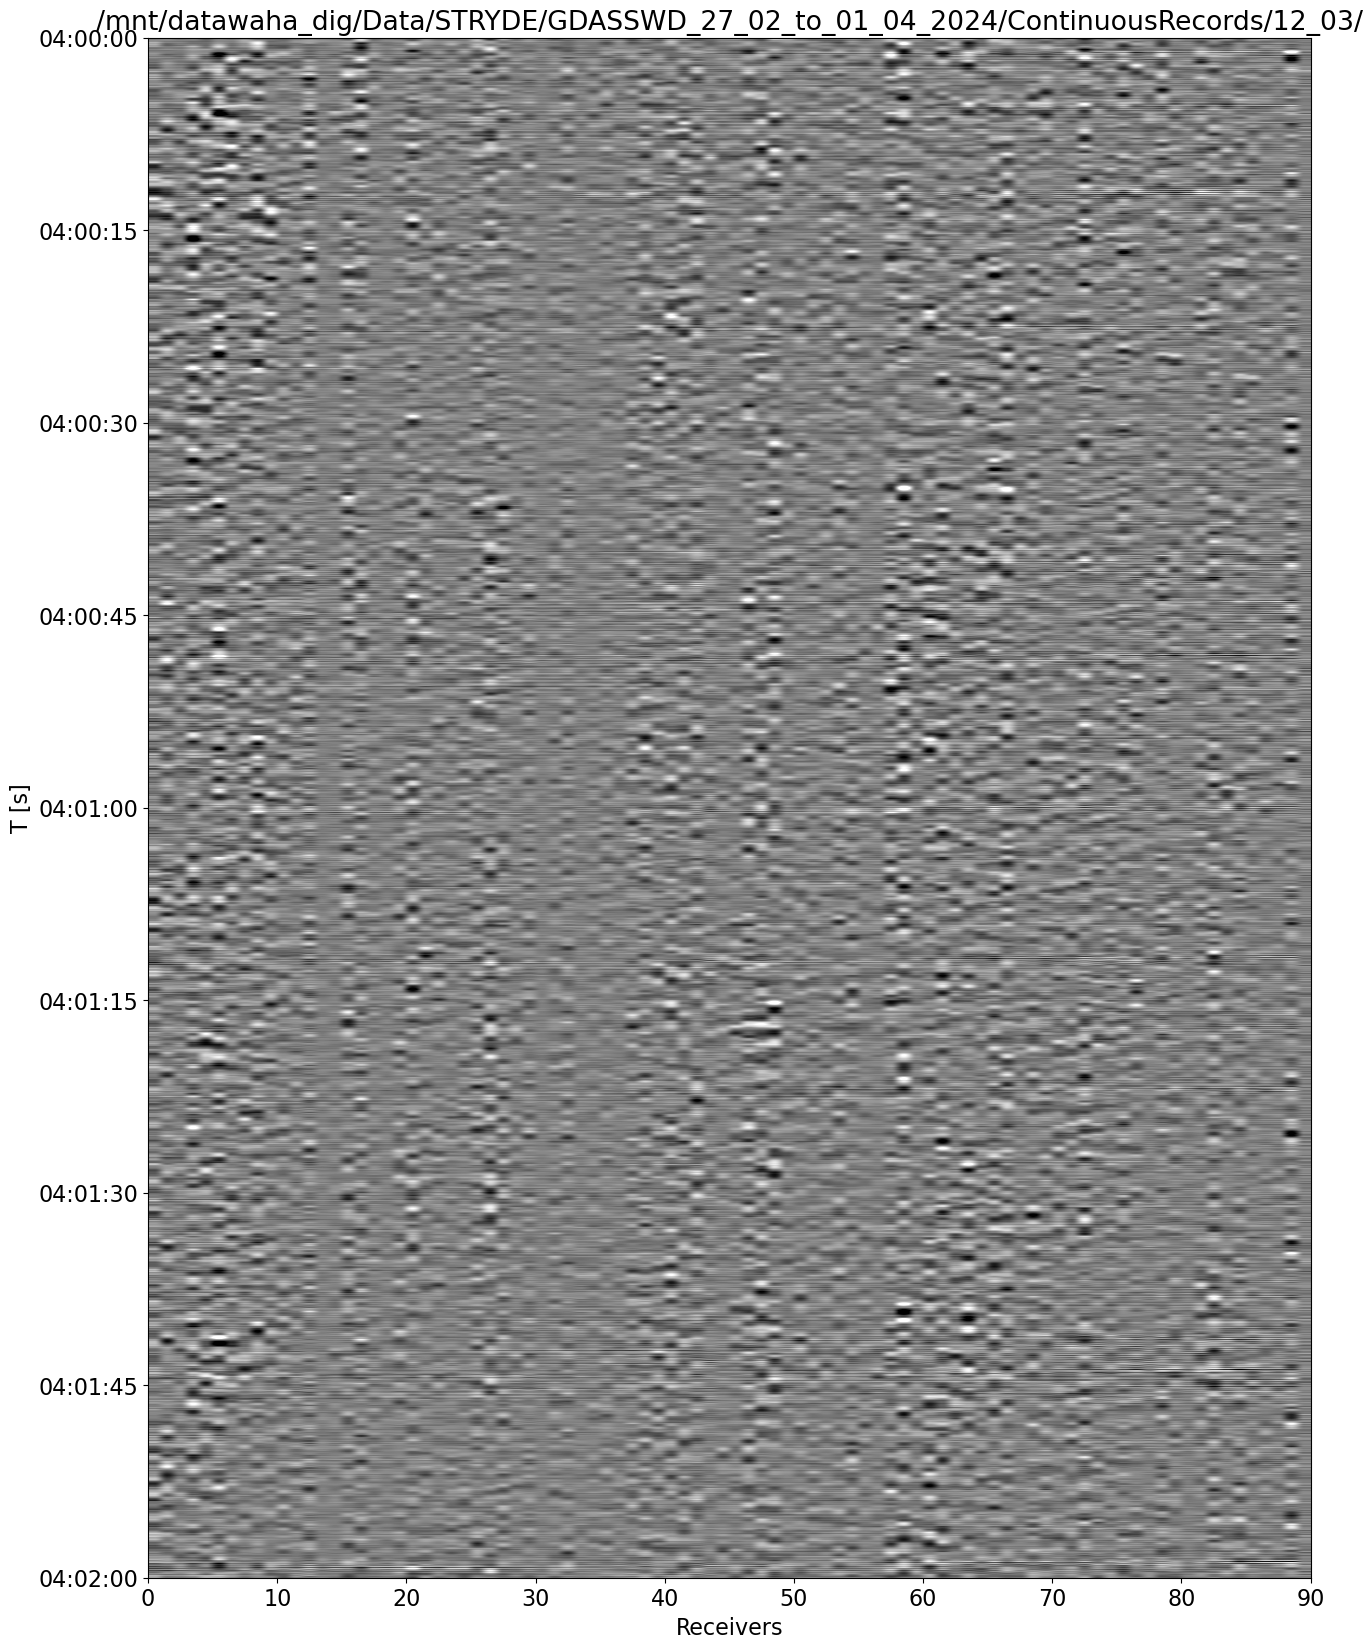

In [5]:
# display continous recording for a given time window multiple of 60sec
f.plotrecord(utctime_start=datetime.datetime(2024, 3, 12, 4, 0),
             utctime_end=datetime.datetime(2024, 3, 12, 4, 2), 
             clip=1e-4, cmap='gray', figsize=(15, 20));

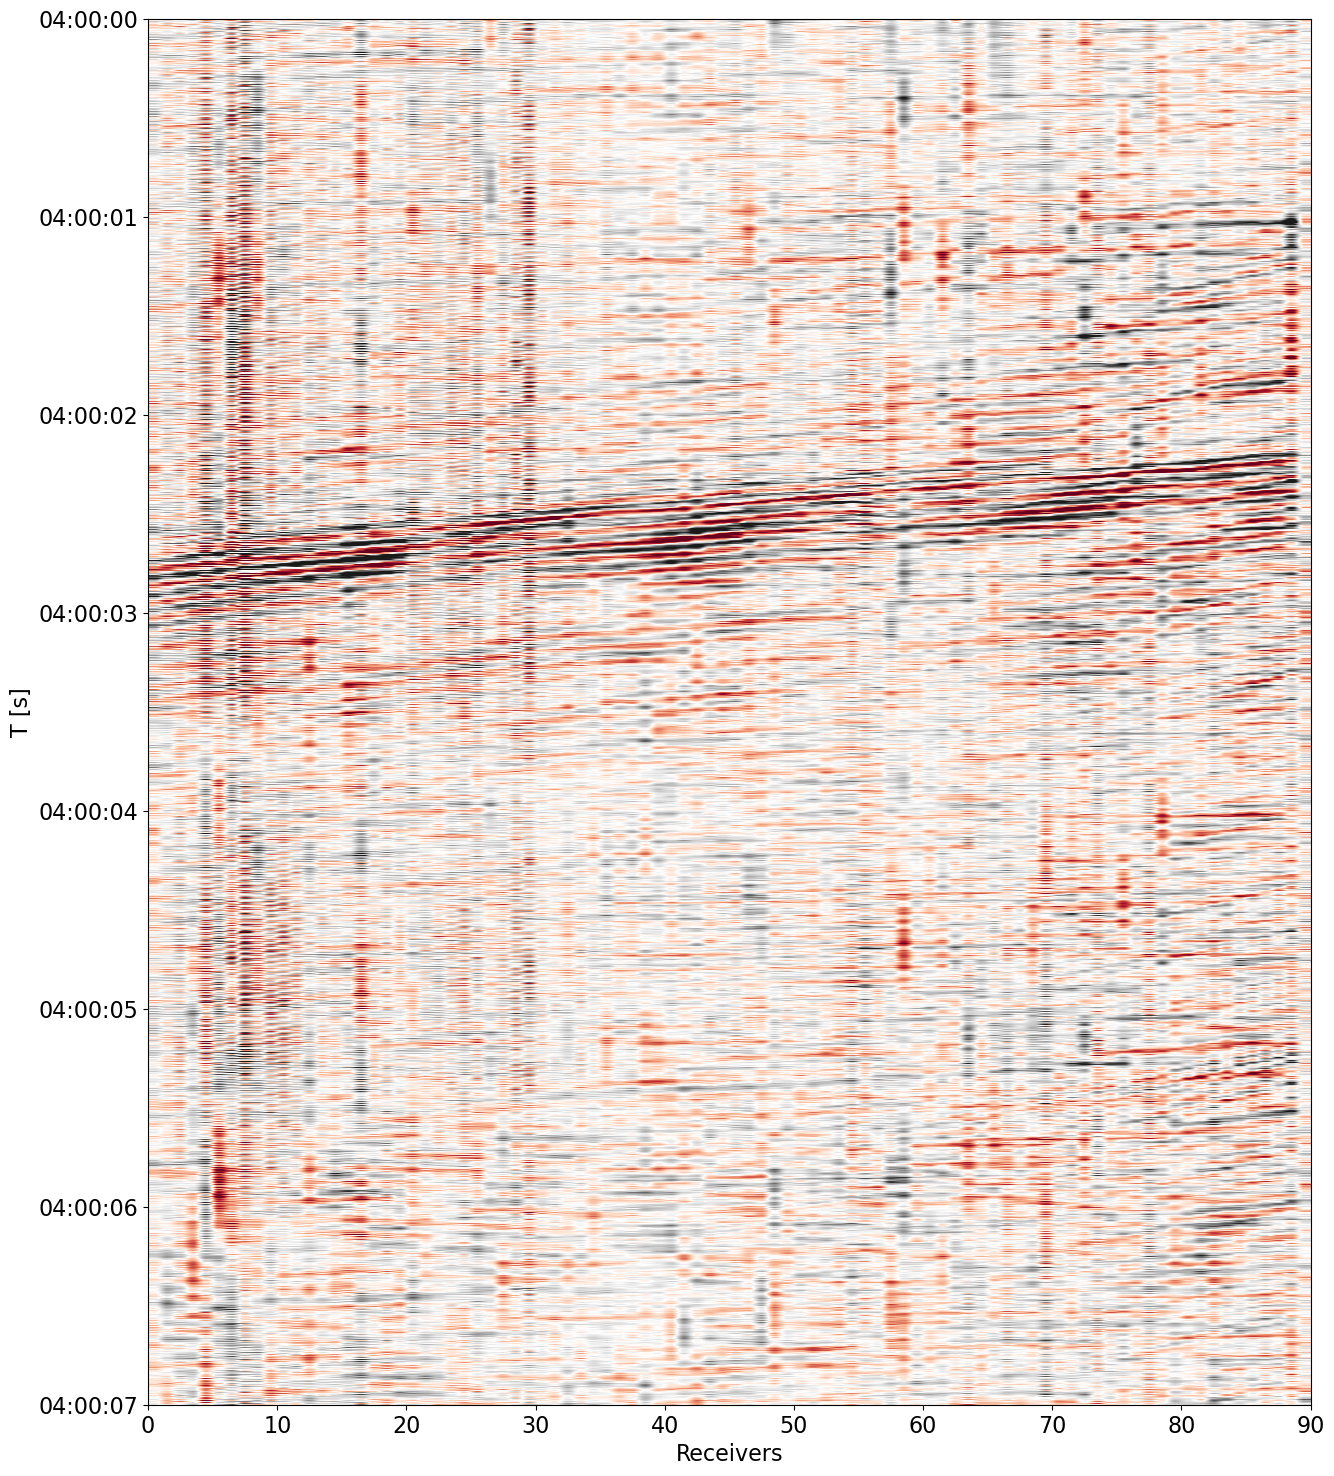

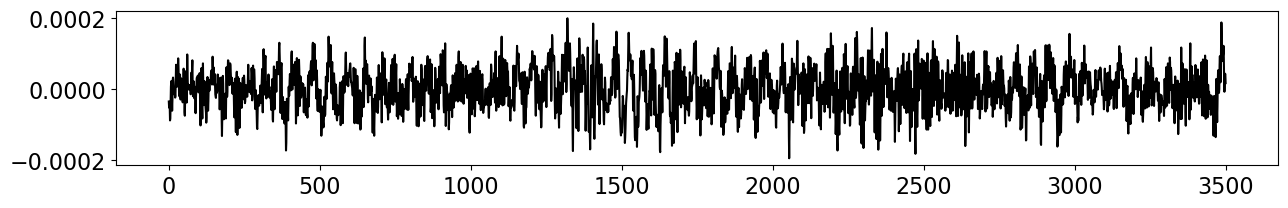

In [6]:
# extact portion of data and display it
data, tlims = f.extract(utctime_start=datetime.datetime(2024, 3, 12, 4, 0),
                        utctime_end=datetime.datetime(2024, 3, 12, 4, 2), 
                        nsamples = int(7/f.dt))

fig, ax = plt.subplots(1, 1, figsize=(15, 18))
ax.imshow(data, cmap='RdGy', vmin=-2e-4, vmax=2e-4, extent=(0, f.nrecs, tlims[-1], tlims[0]))
ax.axis('tight')
ax.set_xlabel('Receivers')
ax.set_ylabel('T [s]')

plt.figure(figsize=(15, 2))
plt.plot(data[:, -1], 'k');

In [7]:
# extact portion of data and compute summary statistics(rms)
data, tlims = f.extract(utctime_start=datetime.datetime(2024, 3, 12, 3, 0),
                        utctime_end=datetime.datetime(2024, 3, 12, 9, 0))


In [8]:
# rms in sliding windows
t = np.arange(data.shape[0]) * f.dt
nwin = int(30 // f.dt) # rms computed over 30s windows
nover = int(1 // f.dt) # overlap of 1s

trms, datarms = sliding_summary(data.T, t, nwin, nover, rms)[:2]

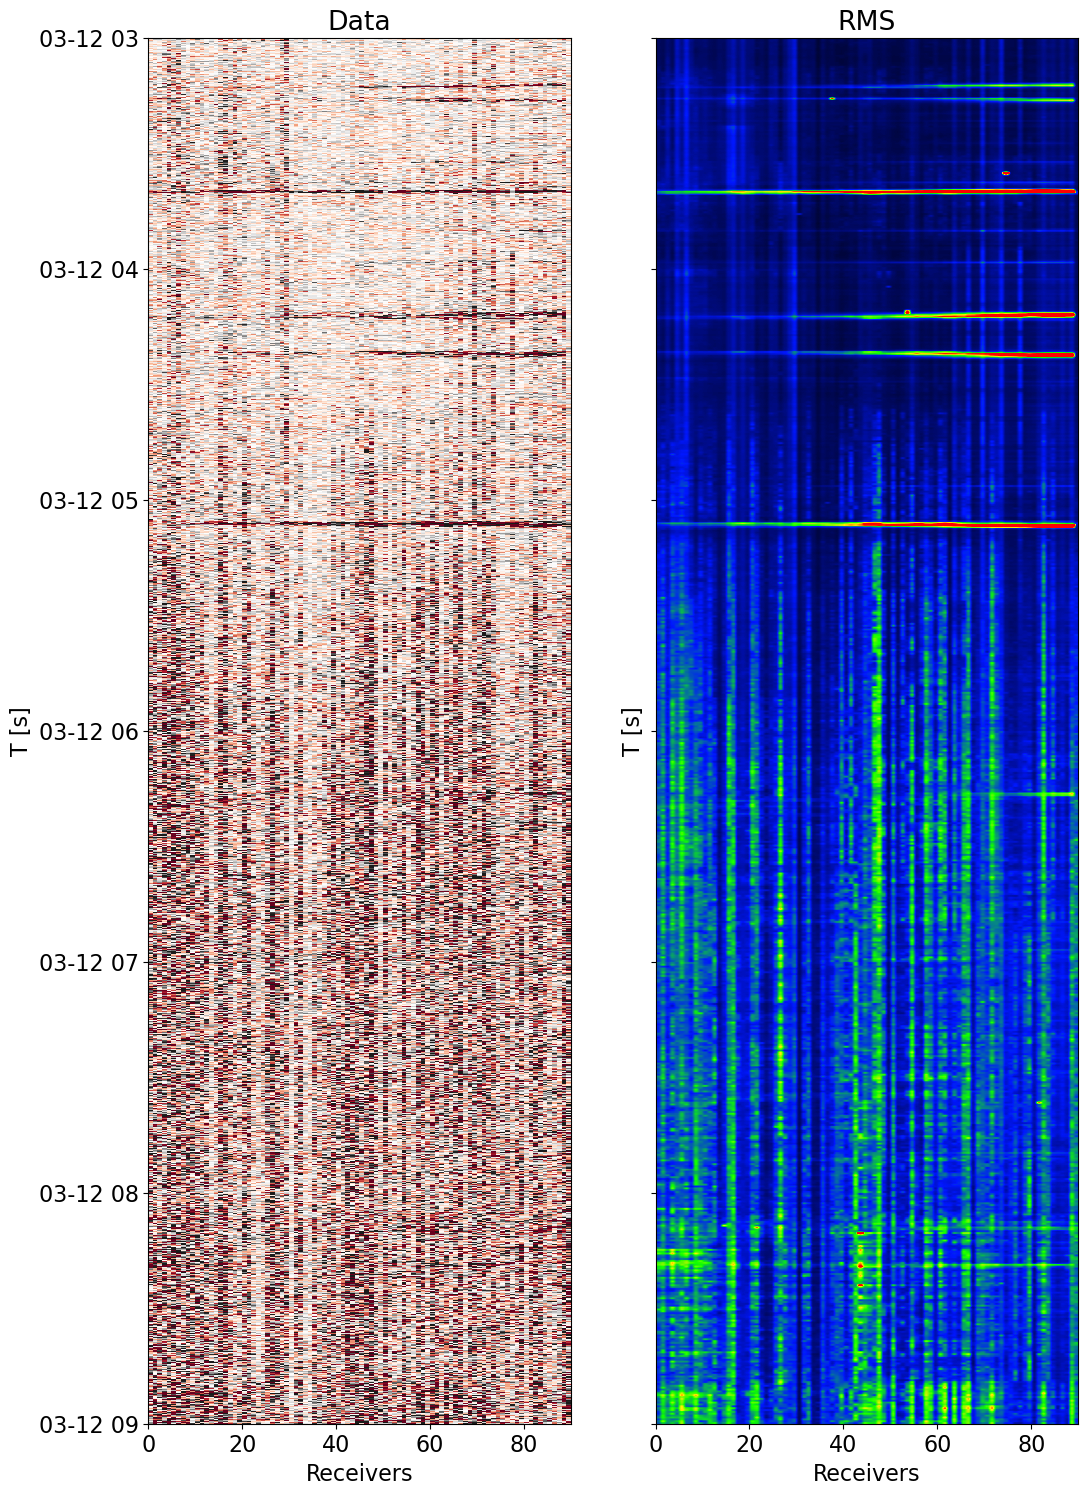

In [9]:
fig, axs = plt.subplots(1, 2, sharey=True, figsize=(12, 18))
axs[0].imshow(data[::100], cmap='RdGy', vmin=-2e-4, vmax=2e-4, interpolation='None',
              extent=(0, f.nrecs, tlims[-1], tlims[0]))
axs[0].axis('tight')
axs[0].set_xlabel('Receivers')
axs[0].set_ylabel('T [s]')
axs[0].set_title('Data')

axs[1].imshow(datarms.T, cmap=cmaps['spectrum_r'], vmin=0, vmax=5e-4, 
              extent=(0, f.nrecs, tlims[-1], tlims[0]))
axs[1].axis('tight')
axs[1].set_xlabel('Receivers')
axs[1].set_ylabel('T [s]')
axs[1].set_title('RMS');